In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
import tensorflow as tf
import numpy as np
tf.executing_eagerly()

X = np.random.rand(1000).astype(np.float32)
print('X=',X)

n = X.shape[0]
Y = X * 9 + 5
print('Y=',Y)

W = tf.Variable(tf.random.normal([1]))
print(W)
b = tf.Variable(tf.random.normal([1]))
print(b)


X= [9.56130266e-01 5.11168599e-01 8.56564045e-01 4.97246981e-01
 4.13716733e-01 8.35305750e-01 3.02021682e-01 9.87852693e-01
 1.95127053e-04 5.74950799e-02 9.47300732e-01 9.91207778e-01
 9.59579647e-01 3.68554682e-01 5.32453716e-01 4.78730410e-01
 3.18631470e-01 5.72795749e-01 9.86022770e-01 9.43829238e-01
 6.86490357e-01 3.03534985e-01 2.88867980e-01 4.18987393e-01
 3.56254607e-01 9.52975631e-01 7.65471995e-01 7.39050329e-01
 1.16286382e-01 4.92487162e-01 3.27377170e-01 2.69450098e-02
 3.74233365e-01 6.79385424e-01 4.21704561e-01 9.97418761e-01
 8.55923533e-01 7.00827241e-01 8.95541668e-01 6.31302372e-02
 8.23195219e-01 4.27620202e-01 5.79257369e-01 1.65151998e-01
 7.39986479e-01 3.03045452e-01 1.83238543e-03 6.84656739e-01
 2.73682177e-01 2.22164437e-01 2.09459886e-02 9.01551247e-01
 7.80660629e-01 5.30083120e-01 9.37337577e-01 4.06874865e-01
 3.07301879e-01 4.24567491e-01 5.98012269e-01 9.13816273e-01
 5.93636511e-03 9.19479012e-01 2.08028182e-01 9.52762544e-01
 8.26925598e-03 7.008

step: 0, loss: 47.338100,W: 1.228253,b: 2.476524
step: 100, loss: 0.029393,W: 8.428234,b: 5.276424
step: 200, loss: 0.029388,W: 8.428398,b: 5.275936
step: 300, loss: 0.029380,W: 8.428589,b: 5.275459
step: 400, loss: 0.029372,W: 8.428780,b: 5.275000
step: 500, loss: 0.029364,W: 8.428970,b: 5.274547
step: 600, loss: 0.029355,W: 8.429161,b: 5.274110
step: 700, loss: 0.029347,W: 8.429352,b: 5.273681
step: 800, loss: 0.029338,W: 8.429543,b: 5.273258
step: 900, loss: 0.029329,W: 8.429733,b: 5.272852
step: 1000, loss: 0.029320,W: 8.429924,b: 5.272447


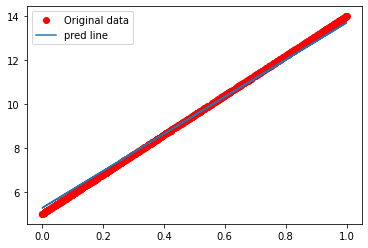

In [ ]:
for step in range(0,1001):
  with tf.GradientTape() as g:
    pred = W*X+b
    loss = tf.reduce_sum(tf.pow(pred-Y,2))/n

  gradient = g.gradient(loss,[W,b])


'''
  自己改下面參數
  tf.keras.optimizers.Adam().apply_gradients(zip(gradient,[W,b]))
'''
  if step % 100 == 0:
    pred = W*X+b
    loss = tf.reduce_sum(tf.pow(pred-Y,2))/n
    print("step: %i, loss: %f,W: %f,b: %f" % (step, loss, W.numpy(),b.numpy()))

import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array( W* X + b), label='pred line')
plt.legend()
plt.show()   

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.2266471], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.429421], dtype=float32)>
step: 0, loss: 23037487104.000000,W: -0.126647,b: -0.329421
step: 100, loss: 14461728768.000000,W: 9.873355,b: 9.670580
step: 200, loss: 8210506752.000000,W: 19.873392,b: 19.670618
step: 300, loss: 4283854848.000000,W: 29.873430,b: 29.670656
step: 400, loss: 2681780480.000000,W: 39.873318,b: 39.670547
step: 500, loss: 2640113152.000000,W: 41.673290,b: 49.670395
step: 600, loss: 2639922688.000000,W: 41.673290,b: 59.670242
step: 700, loss: 2639732736.000000,W: 41.673290,b: 69.670090
step: 800, loss: 2639542528.000000,W: 41.673290,b: 79.669937
step: 900, loss: 2639353088.000000,W: 41.673290,b: 89.669785
step: 1000, loss: 2639163648.000000,W: 41.673290,b: 99.669632
step: 1100, loss: 2638974464.000000,W: 41.673290,b: 109.669479
step: 1200, loss: 2638785024.000000,W: 41.673290,b: 119.669327
step: 1300, loss:

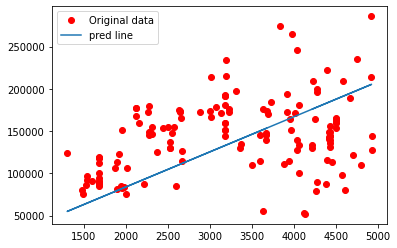

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
tf.executing_eagerly()

train = pd.read_csv("train.csv")
train = train[train['LotArea'] < 5000]
train_X = train['LotArea'].values.reshape(-1,1)
train_Y = train['SalePrice'].values.reshape(-1,1)
n_sample = train_X.shape[0]

W = tf.Variable(tf.random.normal([1]))
print(W)
b = tf.Variable(tf.random.normal([1]))
print(b)

for step in range(0,10001):
  with tf.GradientTape() as g:
    pred = W*train_X+b
    loss = tf.reduce_sum(tf.pow(pred-train_Y,2))/(n_sample)

  gradient = g.gradient(loss,[W,b])

  tf.keras.optimizers.Adam(.1).apply_gradients(zip(gradient,[W,b]))

  if step % 100 == 0:
    pred = W*train_X+b
    loss = tf.reduce_sum(tf.pow(pred-train_Y,2))/(n_sample)
    print("step: %i, loss: %f,W: %f,b: %f" % (step, loss, W.numpy(),b.numpy()))

import matplotlib.pyplot as plt
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array( W* train_X + b), label='pred line')
plt.legend()
plt.show() 